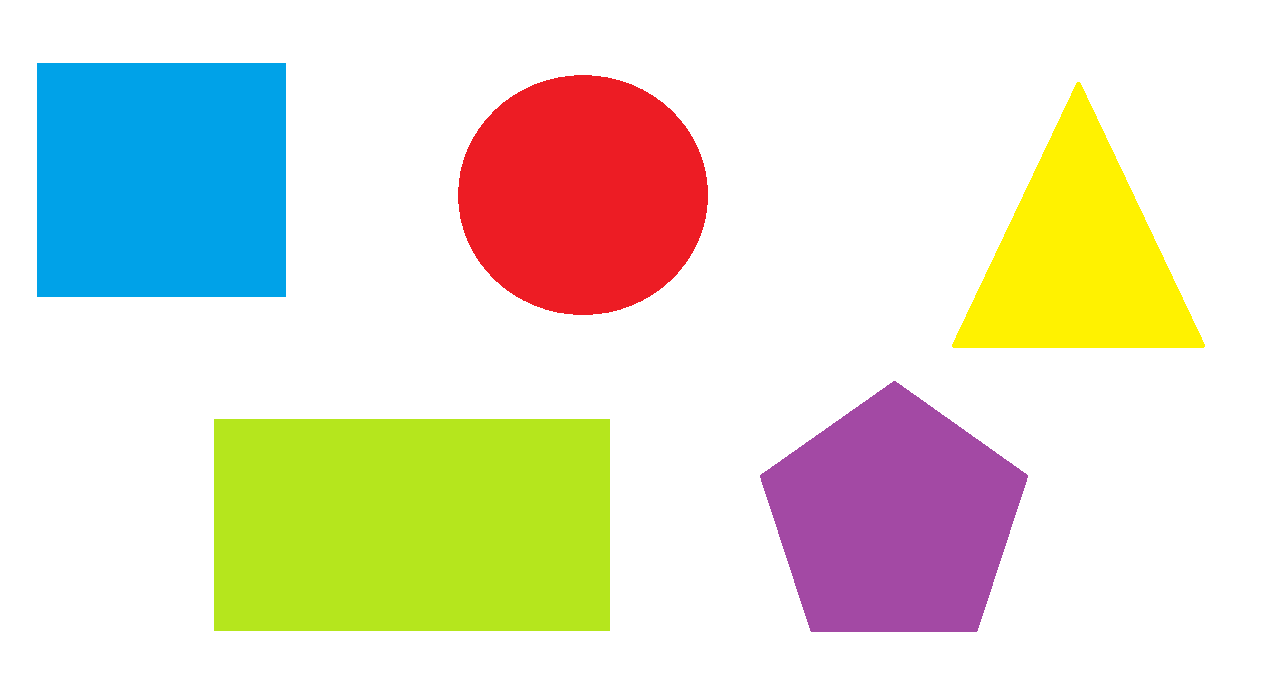

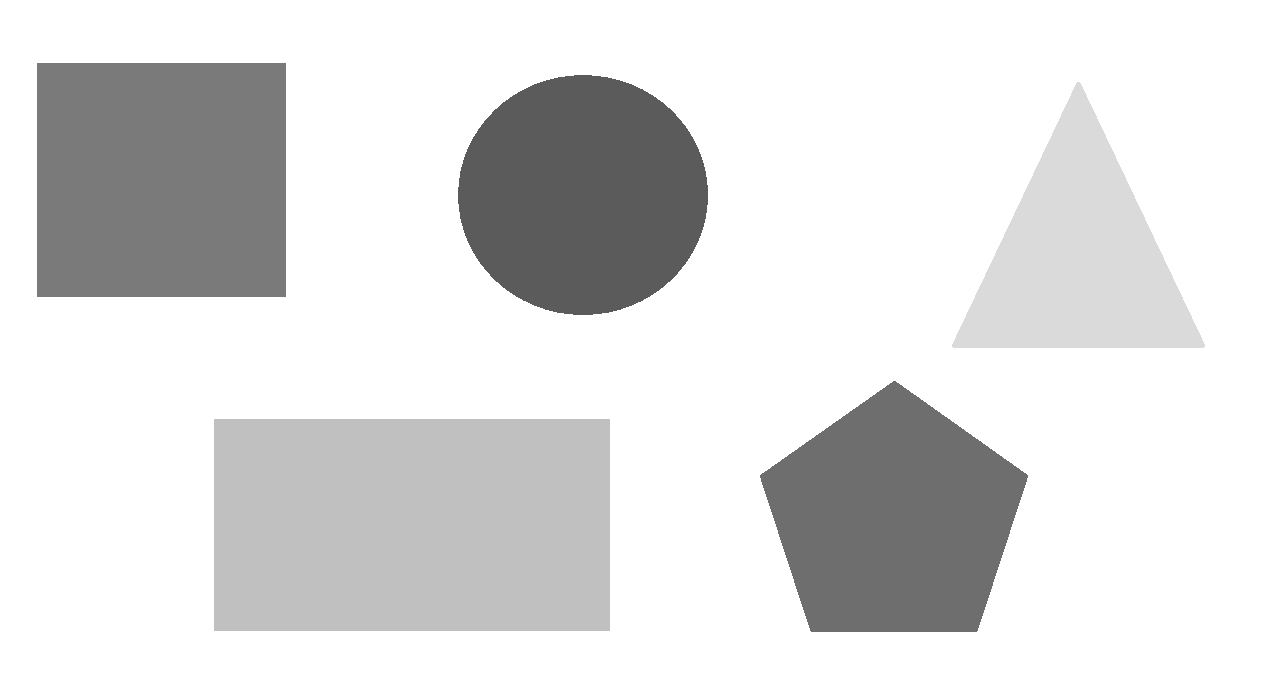

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

img = cv.imread('figuras.png')
imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

cv2_imshow(img)
cv2_imshow(imgGray)

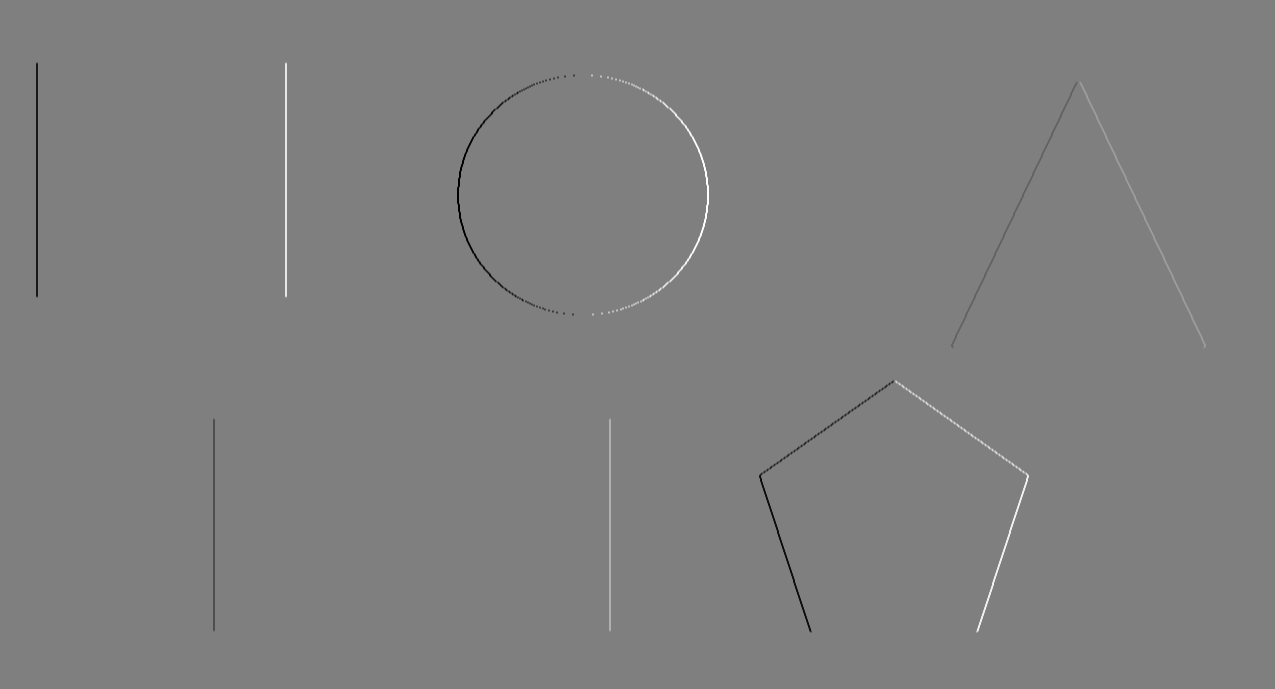

In [2]:
# Gradiente en el eje x
from sklearn.preprocessing import MinMaxScaler
sobel_x = cv.Sobel(np.double(imgGray), ddepth=-1, dx=1, dy=0, ksize=3)
scaler = MinMaxScaler(feature_range=(0, 255))
sobel_x_img = scaler.fit_transform(sobel_x.reshape(-1, 1)).reshape(sobel_x.shape)

cv2_imshow(np.uint8(sobel_x_img))

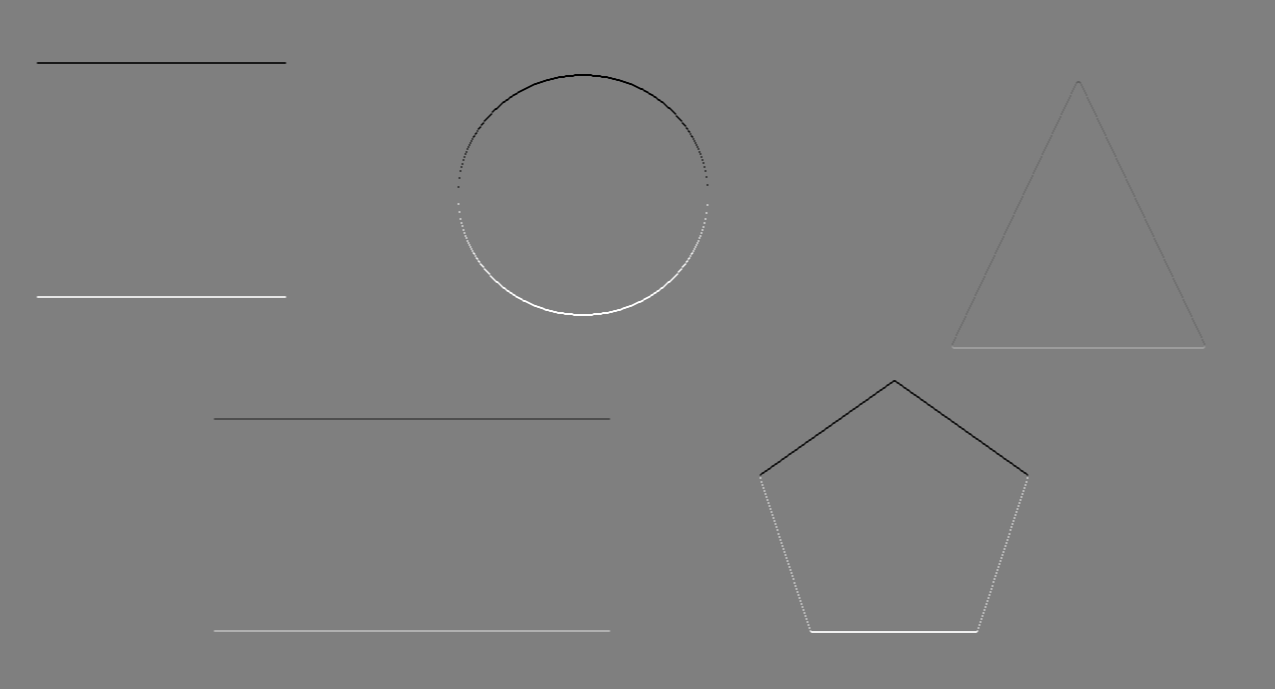

In [3]:
# Gradiente en el eje y
sobel_y = cv.Sobel(np.double(imgGray), ddepth=-1, dx=0, dy=1, ksize=3)
sobel_y_img = scaler.fit_transform(sobel_y.reshape(-1, 1)).reshape(sobel_y.shape)

cv2_imshow(np.uint8(sobel_y_img))

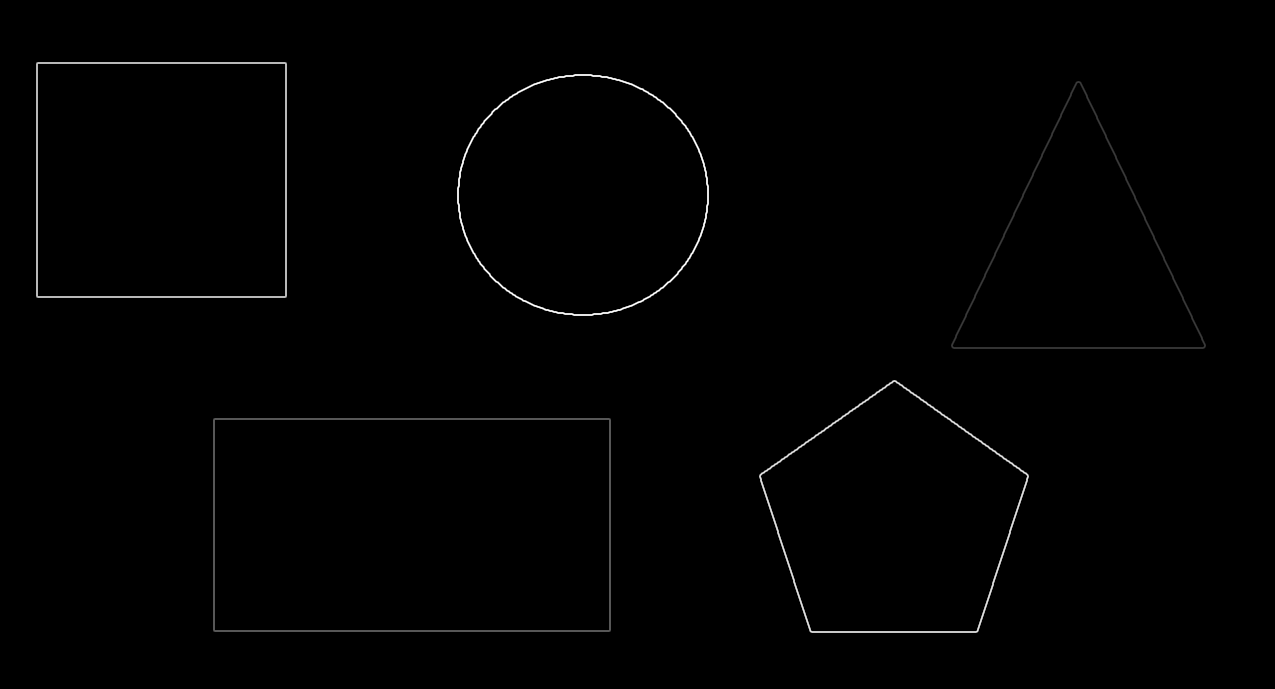

In [4]:
# Imagen gradiente total
imgSobel = np.sqrt(sobel_x**2 + sobel_y**2)
imgSobel = scaler.fit_transform(imgSobel.reshape(-1, 1)).reshape(imgSobel.shape)

cv2_imshow(np.uint8(imgSobel))

/tmp/ipython-input-3150023851.py:2: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(imgSobel.ravel(), 256, [0, 256])


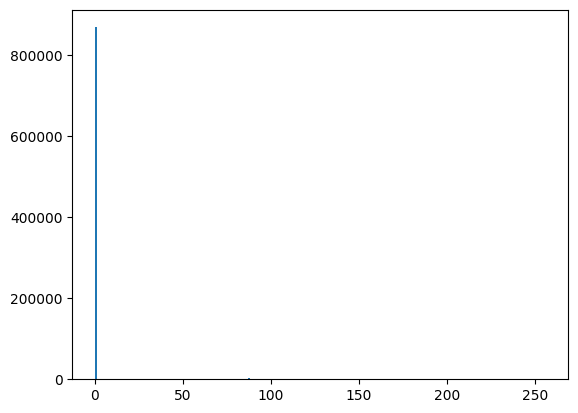

In [5]:
# Histograma de la imagen gradiente total
plt.hist(imgSobel.ravel(), 256, [0, 256])
plt.show()

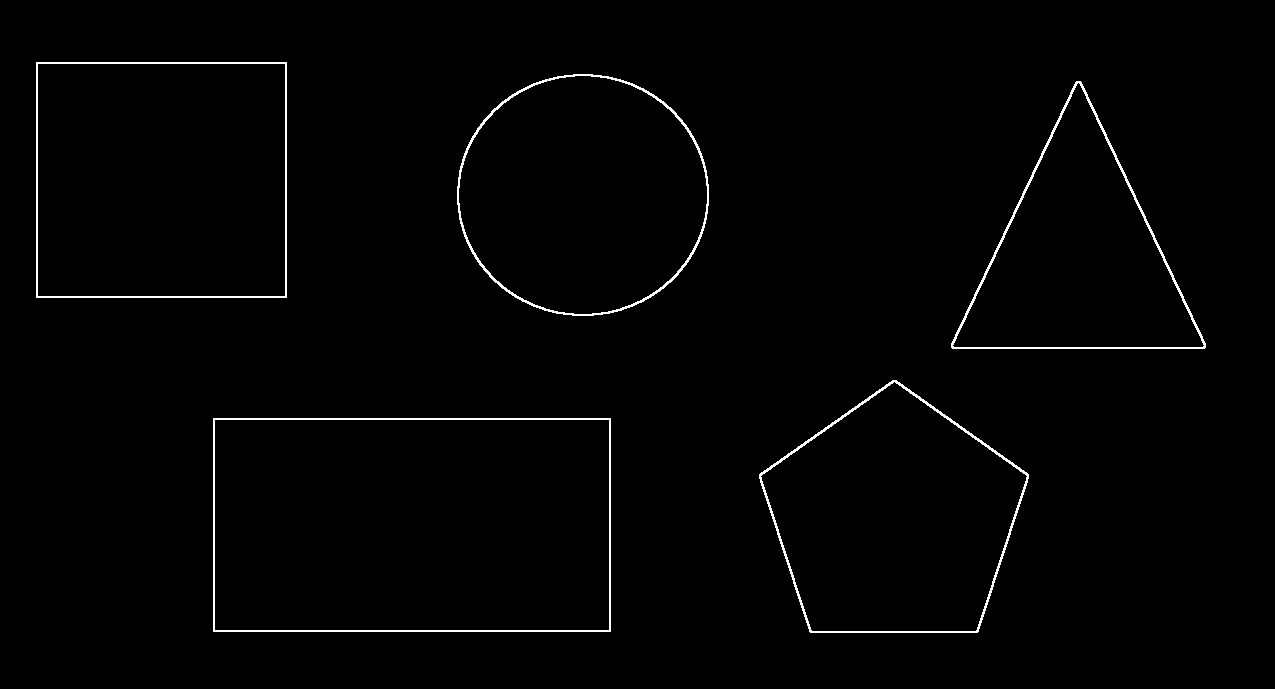

In [6]:
# Binarizar imagen
imgBin = (imgSobel > 10) * 255
cv2_imshow(imgBin)

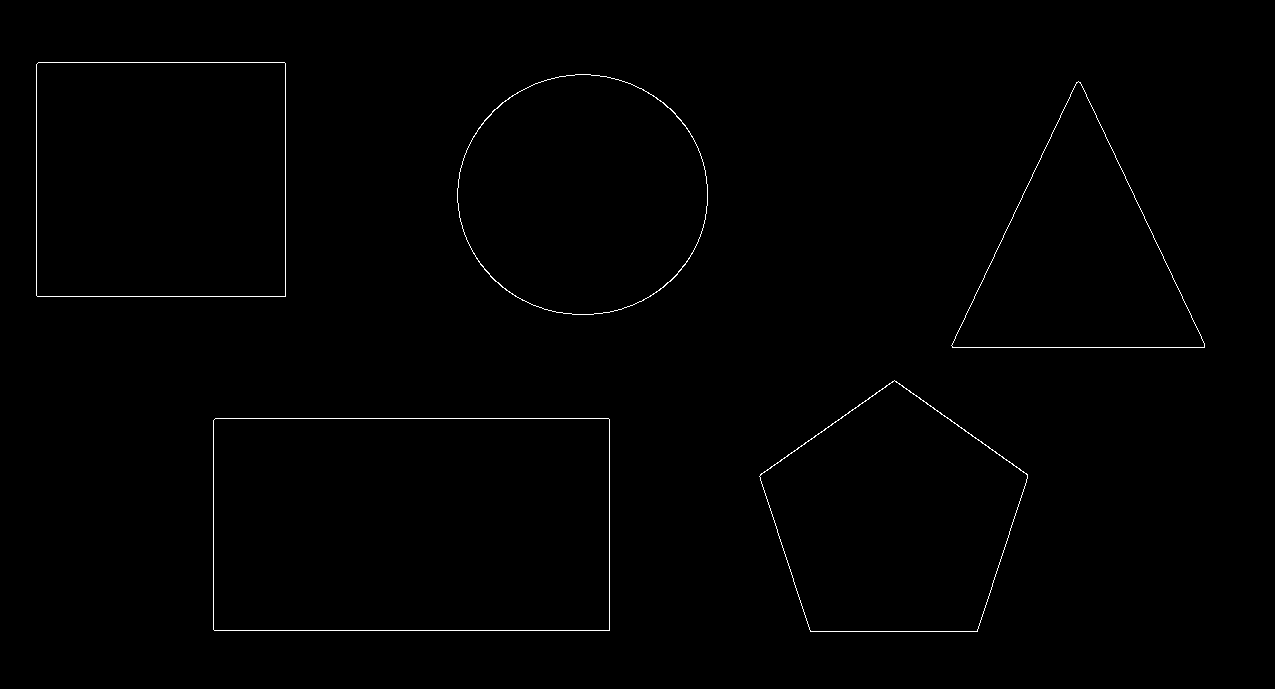

In [7]:
# Algoritmo de Canny
imgCanny = cv.Canny(imgGray, 100, 200)
cv2_imshow(imgCanny)